In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import json

from collections import Counter



In [146]:
# f = open('yelp_academic_dataset_review.json',)
# for line in f:
#     print(line)
# #     data = json.load(line)
# #     print(data)
# f.close()
max_records = 100000
data = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = max_records)

df = pd.DataFrame()
for chunk in data:
    df = pd.concat([df, chunk])
    break
    
print(type(df))
# df =
# df = pd.concat([filtered_data, df_chunk])

# df = pd.concat([filtered_data, df_chunk])

<class 'pandas.core.frame.DataFrame'>


In [147]:
dfOnes = df[df['stars'] == 1]
dfOnes = dfOnes.head(10000)
dfOnes['stars'] = dfOnes['stars'].apply(lambda x: -1)
print(dfOnes.shape)
dfFives = df[df['stars'] == 5]
dfFives = dfFives.head(10000)
dfFives['stars'] = dfFives['stars'].apply(lambda x: 1)
print(dfFives.shape)
dfCombined = pd.concat([dfOnes, dfFives], axis=0)
dfCombined = dfCombined.sample(frac=1)

dfTrainset = dfCombined.head(int(len(dfCombined.index) * .8))
dfTestset = dfCombined.tail(int(len(dfCombined.index) * .2))

print(dfTrainset.shape)
print(dfTestset.shape)

dfCombined

(10000, 9)
(10000, 9)
(16000, 9)
(4000, 9)


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
5398,q2GzUNQj998GSC8IhkN9hg,0,2017-11-18 21:26:55,0,196MCsMKQqUE5GcLBWh12Q,1,"So good, so fresh! Large portions made in a so...",0,1JAPwm4b8_Knz0JJ_Yrwlw
13268,MM25Mc5Yc4S2yPrdaTTyIA,0,2017-07-28 20:46:39,0,irZ6GHbXAU-rO6fDFCQczA,1,CARLOS - MANAGER AND BRIAN - ACCOUNT SPECIALIS...,0,iNB_5m7opwUjTZzOfjgKuA
43580,f8IMQgRwo-8GP372MElDGQ,0,2015-08-31 17:27:53,0,gBt1Z-1qcDM8gzhD6w6odw,-1,Terrible customer service. Absolutely no help...,2,1BTAzJzA7ao28F6Y_OlgyA
43845,ZJKvmjBinGXEagy7l1na7Q,0,2016-12-05 04:24:01,0,tbg-4RUYHMt891we6C3e6g,-1,Wish I could give 0 stars. The service was awf...,0,n9Xlnub9QJ2ovgvbALXT-w
21484,_4Oe9V-qTpU5iemM9bphlA,0,2016-08-04 21:31:48,0,NcL28ZZpK6YYzWxUYfNaDA,1,These guys were top notch. I ended up havin...,0,uYQY-dasOdPACcb-96qbog
3276,quW_e_rh4PCp2snKAijcgw,0,2013-03-18 23:58:00,0,A_Pkir0dlm8c134Tza4rPw,1,finally!!! a starbucks down the street from me...,0,uyfMEBN2AjJ3ODsjVwrREw
4344,6B2z54cn3Ak38UCiPq0luA,1,2015-08-30 15:30:16,0,lhkAGV-6D8qnQxi6O_Ok0A,1,Das frank rocks! So supper nice. Made me feel ...,1,gk7admk6VJ2TkWV4WsS9Tw
20605,I2gsUx1W5-gQzBFbhIxcRQ,0,2018-01-10 23:11:20,0,FYT9dIb28EEPx8JW0JjueA,-1,Perhaps we should differentiate between restau...,0,4q6aIIJgf-KuZYh7UPlZ3w
16536,zidkKI_N1OPxsiddTOQH_Q,0,2018-04-15 18:02:19,0,J3ZJB6hhFFfqFRnifSShaA,1,Excellent little BBQ spot in North Phoenix. Es...,0,_MMel4kdjjwAc3jiEmlRcQ
15121,NhwwW_5JxYHQE4Zlfhu_5w,0,2018-07-17 16:14:41,0,y1Hr6qh3XZFll5tlG-2Bmg,1,"Had the calamari, was pretty amazing.\nWill de...",0,nWzG7AXK_3wGnI0BSLC2MQ


### Part A: Data Exploration

#### EXPLORE THIS SHIT BRO

In [150]:
sample = dfCombined.sample() 
print("Text: " + sample['text'].values[0]  + "\n")
print("Stars: " + str(sample['stars'].values[0]))

Text: I'm very upset with how this whole clinic works all of them, you call one number for all locations so your never able to get through with the medical assistant at the location you visit. They take forever to give you a call back and the customer service Representatives are mostly nice but when you haven't gotten any calls back after being told to keep your phone by you someone will call you in a few mins and its been four hours!!! Its very disappointing. And they all give you the same run around and at this point your a bit annoyed they have sarcastic attitudes. I've been waiting since 9:30 am and its now 2:00 for a call back for a simple precipitation and nobody can give me a answer. After my first trimester I am leaving this place. The first nurse I saw was nice but not a people person which made my first visit uncomfortable. I suggested things to her to make my blood work done, she should have just brought it up. Anyways I hope to have good things to say but at this moment I d

#### RESPONSE: 

In [151]:
# EXPLORE THE WHOLE DATASET....COMBINE ALL THE WORDS AND RANK THEM BY NUMBER OF TIMES THEY APPEAR


In [152]:
allText = ' '.join(dfCombined["text"])
words = allText.split() 

wordCounts = Counter()
for word in words:
    wordCounts[word] += 1
    
print(wordCounts)

Counter({'the': 84846, 'and': 73377, 'I': 59651, 'to': 58274, 'a': 48444, 'was': 36229, 'of': 27475, 'for': 24034, 'is': 22562, 'in': 22490, 'my': 20508, 'that': 17915, 'it': 17784, 'with': 15984, 'The': 15578, 'they': 14668, 'this': 14308, 'on': 13591, 'have': 13477, 'you': 12559, 'not': 12418, 'we': 12230, 'had': 12081, 'but': 11156, 'at': 11018, 'were': 10633, 'me': 9585, 'be': 9460, 'are': 9241, 'so': 9106, 'as': 7383, 'our': 6974, 'We': 6822, 'place': 6782, 'get': 6704, 'out': 6551, 'food': 6385, 'very': 6324, 'would': 6163, 'from': 6137, 'just': 6067, 'an': 5988, 'all': 5909, 'like': 5786, 'there': 5606, 'one': 5460, 'up': 5447, 'will': 5423, 'if': 5329, 'their': 5323, 'time': 5298, 'or': 5221, 'about': 5141, 'when': 5076, 'he': 5008, 'They': 4989, 'back': 4918, 'she': 4897, 'no': 4739, 'service': 4736, 'been': 4648, 'your': 4643, 'here': 4613, 'go': 4606, 'This': 4487, 'what': 4390, 'even': 4192, 'us': 4113, 'because': 4042, 'great': 4005, 'good': 3999, 'them': 3954, 'got': 3919

11676339
101317


<BarContainer object of 25 artists>

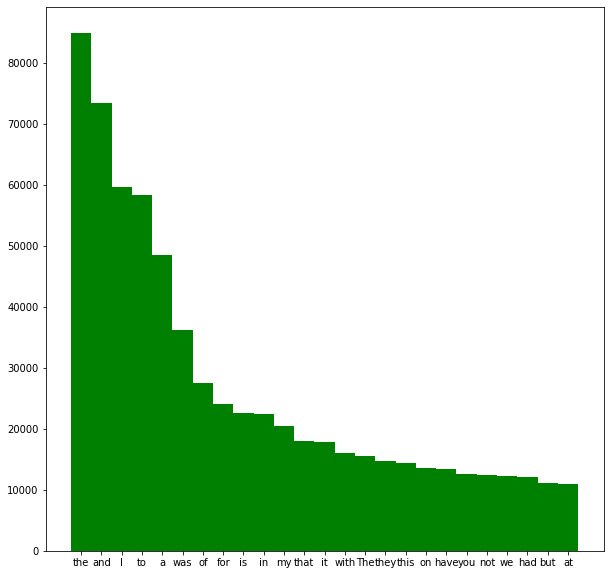

In [153]:
print(len(allText))
print(len(wordCounts))


mostCommon = dict(wordCounts.most_common(25))

# print(mostCommon)

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(mostCommon.keys(), mostCommon.values(), 1, color='g')

In [154]:
leastCommon = dict(wordCounts.most_common()[:-10-1:-1])

In [155]:
leastCommon

{'better...we': 1,
 '($22-32)': 1,
 'papers?': 1,
 'dejar': 1,
 'queriamos': 1,
 'preguntar': 1,
 'nisiquiera': 1,
 'cobrada': 1,
 'venia': 1,
 'esperamos': 1}

In [156]:
# FIND WORDS In ONE STAR VS FIVE STAR THAT ARENT IN BOTH MOST COMMON

allTextFives = ' '.join(dfFives["text"])
wordsFives = allTextFives.split() 

wordCountsFives = Counter()
for word in wordsFives:
    wordCountsFives[word] += 1
    
dfFives
mostCommonFives = dict(wordCountsFives.most_common(100))




allTextOnes = ' '.join(dfOnes["text"])
wordsOnes = allTextOnes.split() 

wordCountsOnes = Counter()
for word in wordsOnes:
    wordCountsOnes[word] += 1
mostCommonOnes = dict(wordCountsOnes.most_common(100))



fivesUnique = { k : mostCommonFives[k] for k in set(mostCommonFives) - set(mostCommonOnes) }
print(fivesUnique)

onesUnique = { k : mostCommonOnes[k] for k in set(mostCommonOnes) - set(mostCommonFives) }

# print(onesUnique)

{'always': 1721, "I've": 1590, 'come': 1071, "I'm": 1184, 'really': 1749, 'love': 1544, 'than': 1038, 'some': 1460, 'friendly': 1167, 'made': 1148, "it's": 1247, 'nice': 1136, 'Great': 1211, 'staff': 1198, 'recommend': 1257, 'best': 1774, 'has': 1425, 'also': 1553, 'great': 3288, '-': 1372, 'can': 1671, 'definitely': 1342}


In [178]:
# FEATURIZE LogisticRegression

def baseline_featurize(review):
    return np.asarray([len(review), 1, 1])   

featurized_data = np.stack(np.asarray(dfCombined["text"].apply(baseline_featurize)))


y_true = np.asarray(dfCombined["stars"])

print(featurized_data.shape)
print(y_true.shape)

model = LogisticRegression()

model.fit(featurized_data, y_true)

def trainModel(X_featurized, y_true):
    model = LogisticRegression()
    model.fit(X_featurized, y_true)
    return model

def predictData(model, X_featurized, y_true):
    y_predict = model.predict(X_featurized)
    total_num = len(y_true)
    total_correct = np.sum([1 if y_predict[i] == y_true[i] else 0 for i in range(len(y_predict))])
    total_incorrect = total_num - total_correct
    accuracy = total_correct / total_num
    print(sklearn.metrics.confusion_matrix(y_true, y_predict, labels=[-1, 1]))
    # CONFUSION MATRIX....
    print(accuracy)
    return accuracy
    
    
    
    

# currFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(baseline_featurize)))
# currModel = trainModel(currFeaturized_data, np.asarray(dfTrainset["stars"]))

# testFeaturized_data = np.stack(np.asarray(dfTestset["text"].apply(baseline_featurize)))




# predictData(currModel, testFeaturized_data, np.asarray(dfTestset["stars"]))



(20000, 3)
(20000,)


In [158]:
model.predict(featurized_data)

array([ 1,  1,  1, ...,  1, -1,  1])

In [159]:
modifiedCounter = Counter(el for el in wordCounts.elements() if wordCounts[el] > 1)
print(len(modifiedCounter))

wordsOrdered = [key for key, _ in modifiedCounter.most_common()]
def bag_of_words_featurize(review):
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] += 1
    return vec
            
            
    
            
    

bag_of_words_featurize("the the andthe ")         
    
                    
    

40571


array([2., 0., 0., ..., 0., 0., 0.])

In [160]:
currBagFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_featurize)))
print("HELLO")
currBagModel = trainModel(currBagFeaturized_data, np.asarray(dfTrainset["stars"]))
print("HELLO2")
testFeaturizedBag_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_featurize)))
print("HELLO3")



predictData(currBagModel, testFeaturizedBag_data, np.asarray(dfTestset["stars"]))

HELLO
HELLO2
HELLO3
0.95875


0.95875

In [161]:
print(currBagFeaturized_data)

[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1.  2.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 1.  0.  1. ...  0.  0.  0.]
 [18.  6.  2. ...  0.  0.  0.]
 [ 0.  1.  0. ...  0.  0.  0.]]


In [162]:
intermed = dict(enumerate(wordsOrdered))
wordPosition = {y:x for x,y in intermed.items()}



wordPosition

{'the': 0,
 'and': 1,
 'I': 2,
 'to': 3,
 'a': 4,
 'was': 5,
 'of': 6,
 'for': 7,
 'is': 8,
 'in': 9,
 'my': 10,
 'that': 11,
 'it': 12,
 'with': 13,
 'The': 14,
 'they': 15,
 'this': 16,
 'on': 17,
 'have': 18,
 'you': 19,
 'not': 20,
 'we': 21,
 'had': 22,
 'but': 23,
 'at': 24,
 'were': 25,
 'me': 26,
 'be': 27,
 'are': 28,
 'so': 29,
 'as': 30,
 'our': 31,
 'We': 32,
 'place': 33,
 'get': 34,
 'out': 35,
 'food': 36,
 'very': 37,
 'would': 38,
 'from': 39,
 'just': 40,
 'an': 41,
 'all': 42,
 'like': 43,
 'there': 44,
 'one': 45,
 'up': 46,
 'will': 47,
 'if': 48,
 'their': 49,
 'time': 50,
 'or': 51,
 'about': 52,
 'when': 53,
 'he': 54,
 'They': 55,
 'back': 56,
 'she': 57,
 'no': 58,
 'service': 59,
 'been': 60,
 'your': 61,
 'here': 62,
 'go': 63,
 'This': 64,
 'what': 65,
 'even': 66,
 'us': 67,
 'because': 68,
 'great': 69,
 'good': 70,
 'them': 71,
 'got': 72,
 'by': 73,
 'only': 74,
 'never': 75,
 'her': 76,
 'My': 77,
 'do': 78,
 'told': 79,
 'said': 80,
 'which': 81,
 'ca

In [170]:
def weightOfWords(word):
    if word not in wordPosition.keys():
        print("Word does not exist in model, no weight is assigned to it")
        return
    return currBagModel.coef_[0][wordPosition[word]]


weightOfWords('she')


-0.3563788092571918

In [171]:
def bag_of_words_binary_featurize(review):
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] = 1
    return vec





currBinBagFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_binary_featurize)))
print("HELLO")
currBinBagModel = trainModel(currBinBagFeaturized_data, np.asarray(dfTrainset["stars"]))
print("HELLO2")
testFeaturizedBinBag_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_binary_featurize)))
print("HELLO3")


predictData(currBinBagModel, testFeaturizedBinBag_data, np.asarray(dfTestset["stars"]))


HELLO
HELLO2
HELLO3
0.95475


0.95475

In [173]:
def bag_of_words_neg_featurize(review):
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] += 1
            else:
                vec[wordsOrdered.index(word)] += 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec

neg_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_neg_featurize)))
print("HELLO")
negModel = trainModel(neg_data, np.asarray(dfTrainset["stars"]))
print("HELLO2")
testFeaturizedNeg_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_neg_featurize)))
print("HELLO3")


predictData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["stars"]))


HELLO
HELLO2
HELLO3
0.96


0.96

In [183]:
predictData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["stars"]))

[[1931   74]
 [  86 1909]]
0.96


0.96

In [184]:
def bag_of_words_neg_binary_featurize(review):
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] = 1
            else:
                vec[wordsOrdered.index(word)] = 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec

negbin_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_neg_binary_featurize)))
print("HELLO")
negBinModel = trainModel(negbin_data, np.asarray(dfTrainset["stars"]))
print("HELLO2")
testFeaturizedNegBin_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_neg_binary_featurize)))
print("HELLO3")


predictData(negBinModel, testFeaturizedNegBin_data, np.asarray(dfTestset["stars"]))

HELLO
HELLO2
HELLO3
[[1927   78]
 [  93 1902]]
0.95725


0.95725

In [ ]:
# EXTRA CREDIT:.....HELLo......(BIGRAM REMEMBER) 0.97 REQUIRED

In [6]:
# RUN EVERY WITH 1-2 and 4-5 STARS
# RUN EVERYTHING WITH NEW DATASET
# BIGRAMS, NUMPY ARRAYS

ValueError: Expected object or value

In [14]:
max_records = 140000
data = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = max_records)

df = pd.DataFrame()
for chunk in data:
    df = pd.concat([df, chunk])
    break
    
print(type(df))


df.to_csv(r'yelp_academic_dataset_review.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
